In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
tickers = [
    'HINDALCO.NS', 'AXISBANK.NS', 'RECLTD.NS', 'DLF.NS', 'WIPRO.NS', 'BIOCON.NS',
    'HAVELLS.NS', 'AUROPHARMA.NS', 'DABUR.NS', 'SUNPHARMA.NS', 'BAJFINANCE.NS',
    'ONGC.NS', 'PIDILITIND.NS', 'DIVISLAB.NS', 'BANDHANBNK.NS', 'AMBUJACEM.NS',
    'ULTRACEMCO.NS', 'VEDL.NS', 'SIEMENS.NS', 'MPHASIS.NS', 'INDIGO.NS',
    'BERGEPAINT.NS', 'GAIL.NS', 'ACC.NS', 'ICICIGI.NS', 'HINDPETRO.NS',
    'RELIANCE.NS', 'TCS.NS', 'ZEEL.NS', 'POWERGRID.NS', 'BOSCHLTD.NS',
    'SYNGENE.NS', 'GRINDWELL.NS', 'UBL.NS', 'GLAXO.NS', 'PERSISTENT.NS',
    'IGL.NS', 'GODREJCP.NS', 'LUPIN.NS', 'TORNTPHARM.NS', 'ADANIGREEN.NS',
    'SRF.NS', 'TATACONSUM.NS', 'FEDERALBNK.NS', 'INDUSINDBK.NS', 'HONAUT.NS',
    'CANBK.NS', 'HDFCLIFE.NS', 'TATACHEM.NS', 'ITC.NS'
]
market_ticker = '^NSEI'
all_tickers = tickers + [market_ticker]

data_comb = yf.download(all_tickers, start="2020-01-01", end="2024-11-05", auto_adjust=False)['Adj Close']
data = yf.download(tickers, start="2020-01-01", end="2024-11-05", auto_adjust=False)['Adj Close']


simple_returns = data_comb.pct_change().dropna()
log_returns = np.log(data_comb / data_comb.shift(1)).dropna()

market_returns = simple_returns[market_ticker]
market_returns_log = log_returns[market_ticker]

asset_returns = simple_returns[tickers]
asset_returns_log = log_returns[tickers]


simple_daily_returns = data.pct_change().dropna()
log_daily_returns = np.log(data / data.shift(1)).dropna()

simple_weekly_returns = data.resample('W').ffill().pct_change().dropna()
simple_monthly_returns = data.resample('ME').ffill().pct_change().dropna()

log_weekly_returns = np.log(data.resample('W').ffill() / data.resample('W').ffill().shift(1)).dropna()
log_monthly_returns = np.log(data.resample('ME').ffill() / data.resample('ME').ffill().shift(1)).dropna()


cov_daily = simple_daily_returns.cov()
cov_weekly = simple_weekly_returns.cov()
cov_monthly = simple_monthly_returns.cov()


cov_daily_log = log_daily_returns.cov()
cov_weekly_log = log_weekly_returns.cov()
cov_monthly_log = log_monthly_returns.cov()

corr_daily = simple_daily_returns.corr()
corr_weekly = simple_weekly_returns.corr()
corr_monthly = simple_monthly_returns.corr()

corr_daily_log = log_daily_returns.corr()
corr_weekly_log = log_weekly_returns.corr()
corr_monthly_log = log_monthly_returns.corr()

[*********************100%***********************]  51 of 51 completed
[*********************100%***********************]  50 of 50 completed
<ipython-input-2-42b57ef02029>:20: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  simple_returns = data_comb.pct_change().dropna()


In [3]:
def calculate_covariance_matrix(returns):
    n = len(returns.columns)
    covariance_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            X = returns.iloc[:, i]
            Y = returns.iloc[:, j]
            cov = np.sum((X - X.mean()) * (Y - Y.mean())) / (len(X) - 1)
            covariance_matrix[i, j] = cov
    return pd.DataFrame(covariance_matrix, index=returns.columns, columns=returns.columns)

def calculate_correlation_matrix(covariance_matrix):
    n = len(covariance_matrix)
    correlation_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                correlation_matrix[i, j] = 1
            else:
                std_i = np.sqrt(covariance_matrix.iloc[i, i])
                std_j = np.sqrt(covariance_matrix.iloc[j, j])
                correlation_matrix[i, j] = covariance_matrix.iloc[i, j] / (std_i * std_j)
    return pd.DataFrame(correlation_matrix, index=covariance_matrix.index, columns=covariance_matrix.columns)

self_daily_cov = calculate_covariance_matrix(log_daily_returns)
self_daily_corr = calculate_correlation_matrix(self_daily_cov)

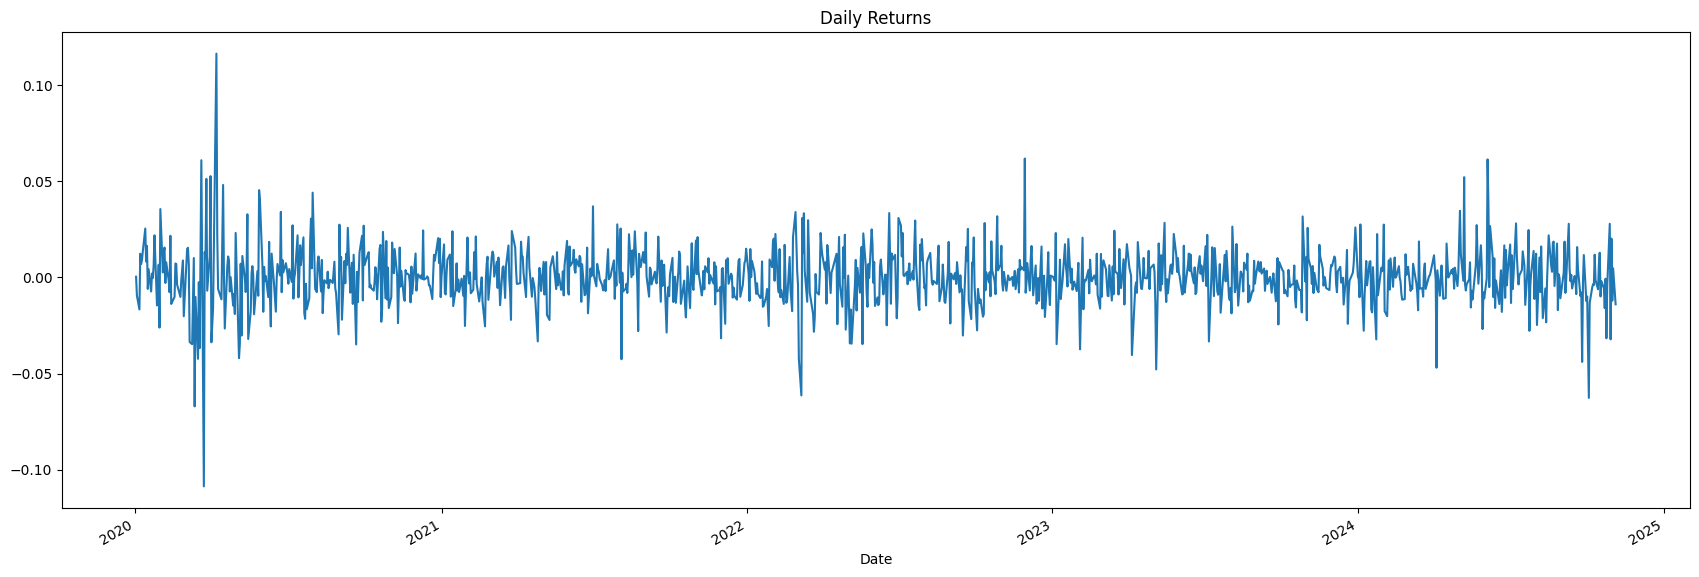

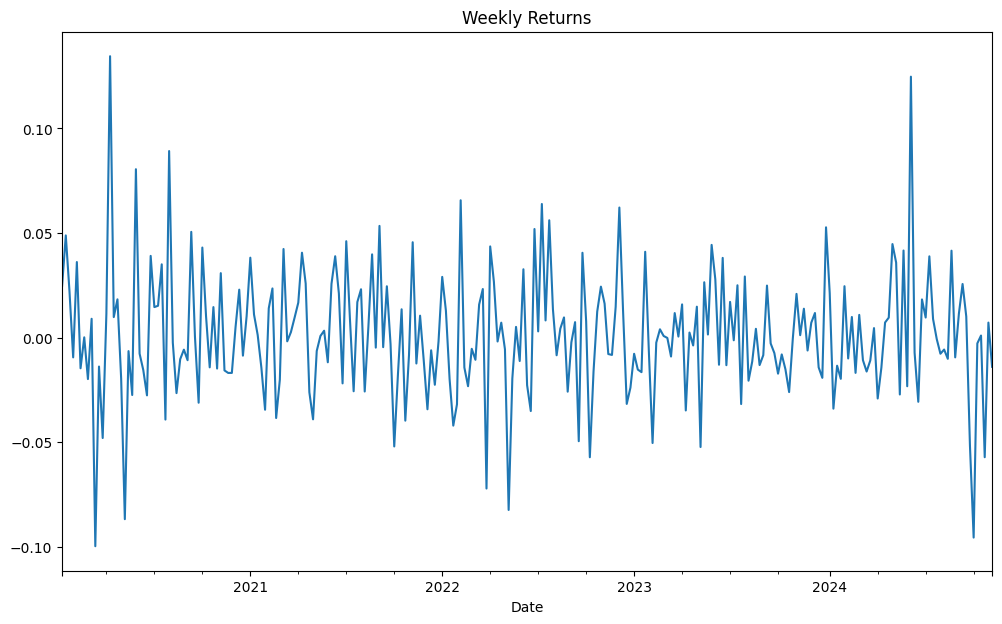

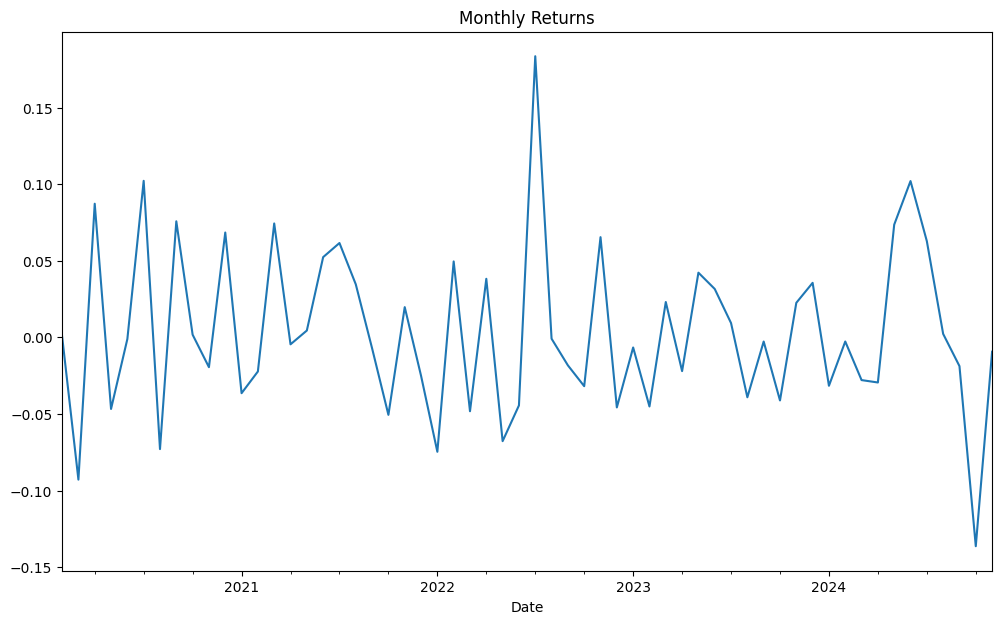

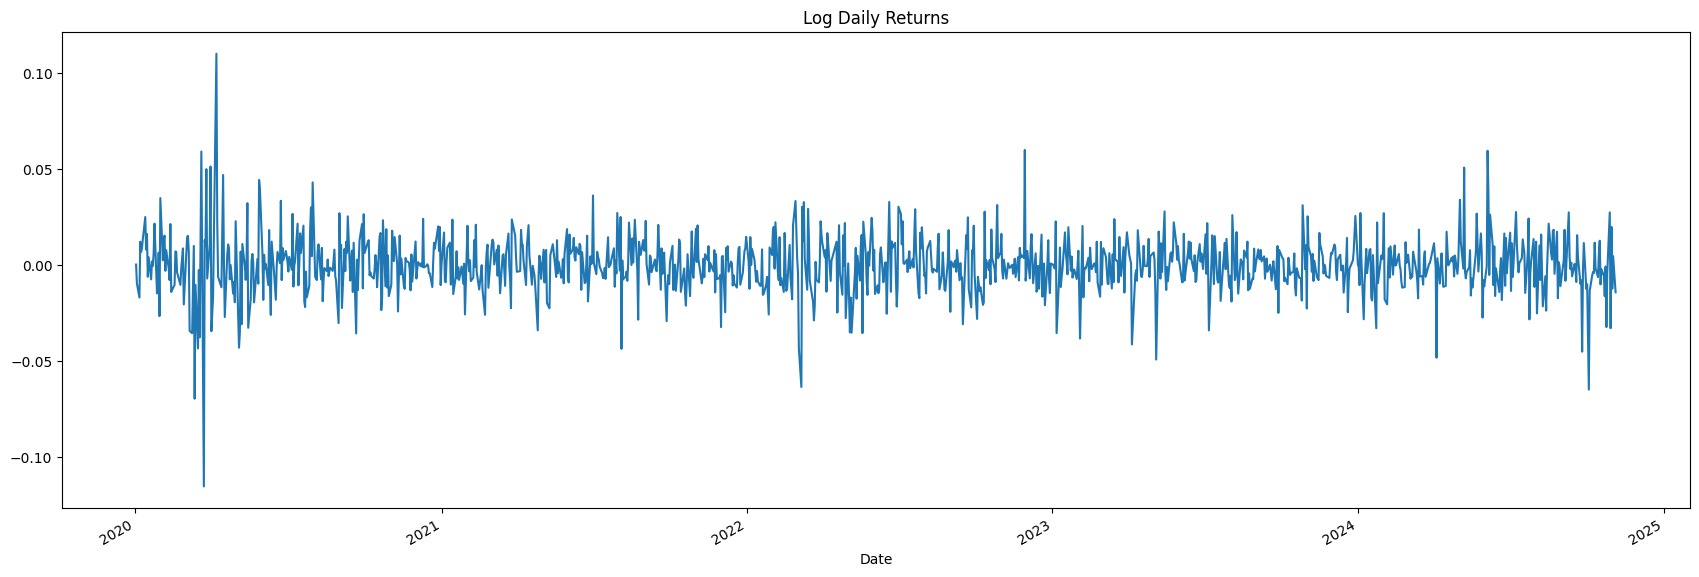

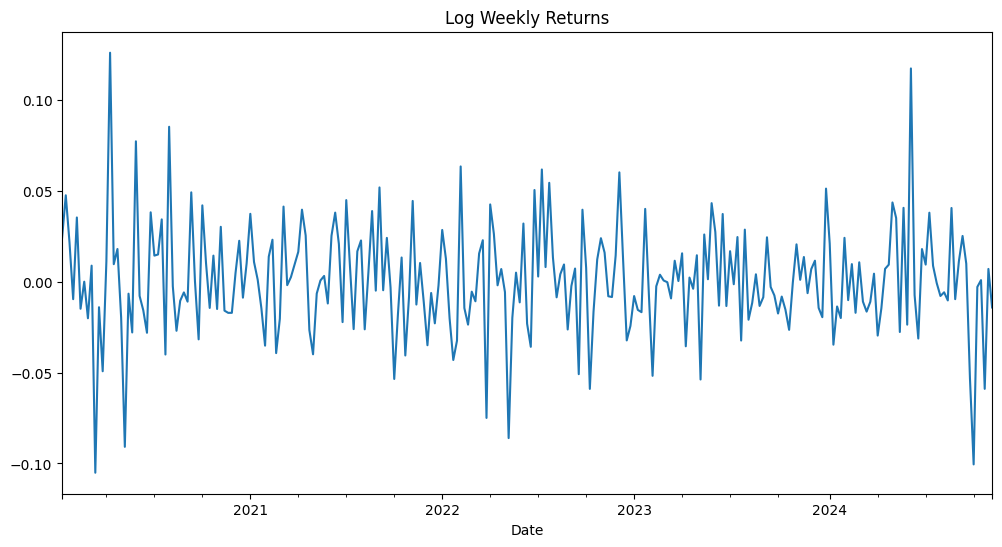

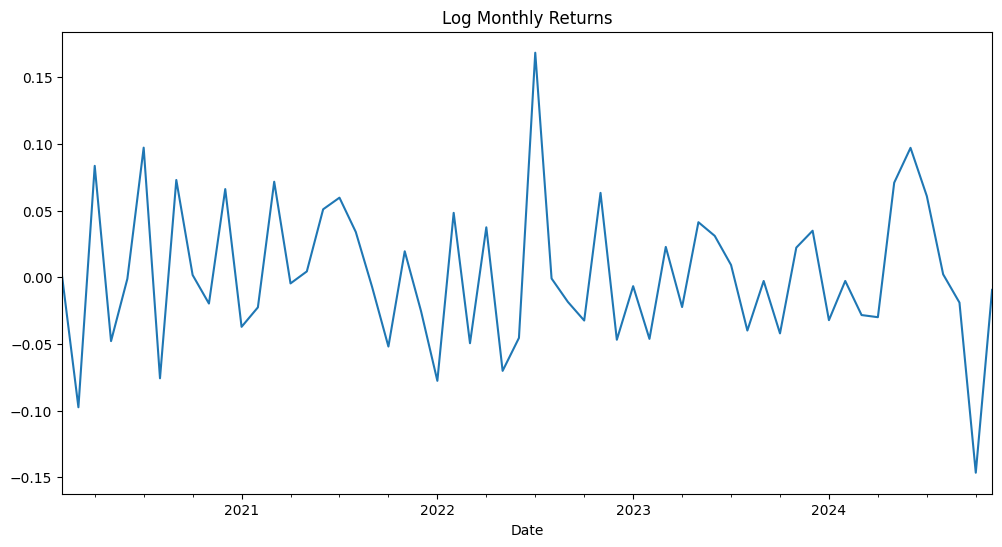

In [4]:
simple_daily_returns['DABUR.NS'].plot(figsize=(21, 7))
plt.title('Daily Returns')
plt.show()

simple_weekly_returns['DABUR.NS'].plot(figsize=(12, 7))
plt.title('Weekly Returns')
plt.show()

simple_monthly_returns['DABUR.NS'].plot(figsize=(12, 7))
plt.title('Monthly Returns')
plt.show()

log_daily_returns['DABUR.NS'].plot(figsize=(21, 7))
plt.title('Log Daily Returns')
plt.show()

log_weekly_returns['DABUR.NS'].plot(figsize=(12, 6))
plt.title('Log Weekly Returns')
plt.show()

log_monthly_returns['DABUR.NS'].plot(figsize=(12, 6))
plt.title('Log Monthly Returns')
plt.show()

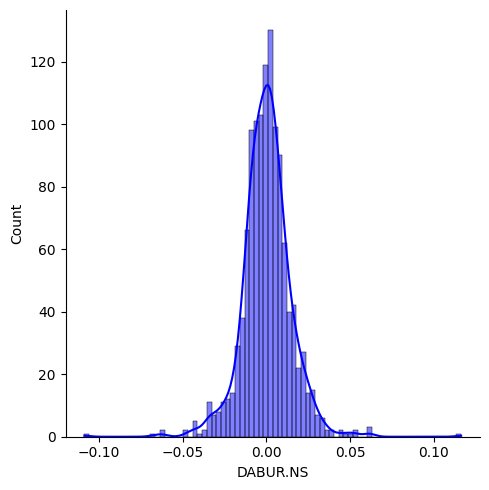

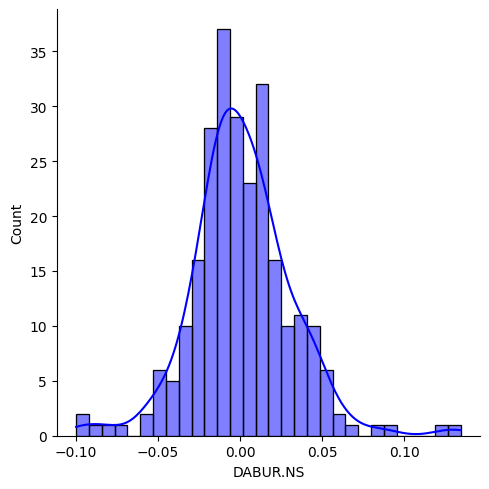

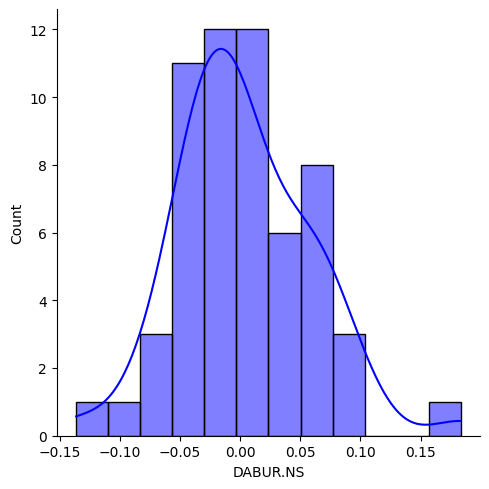

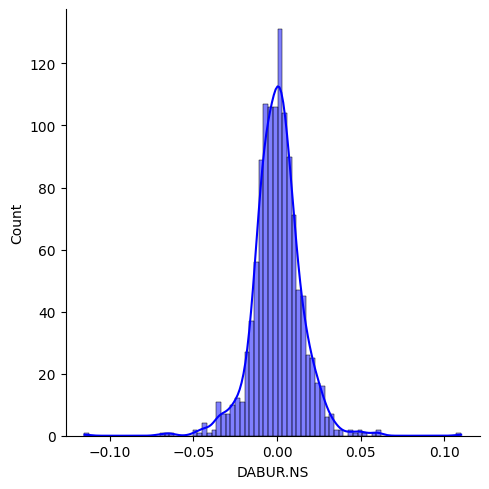

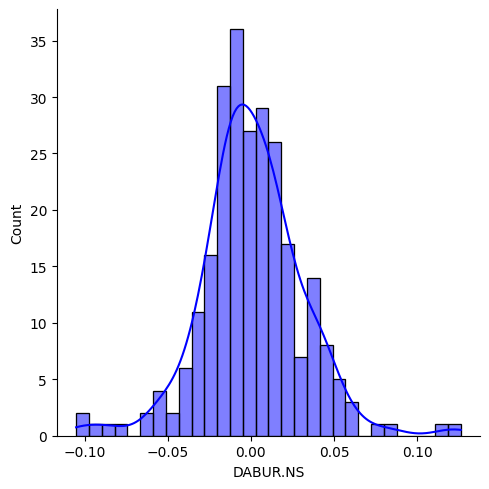

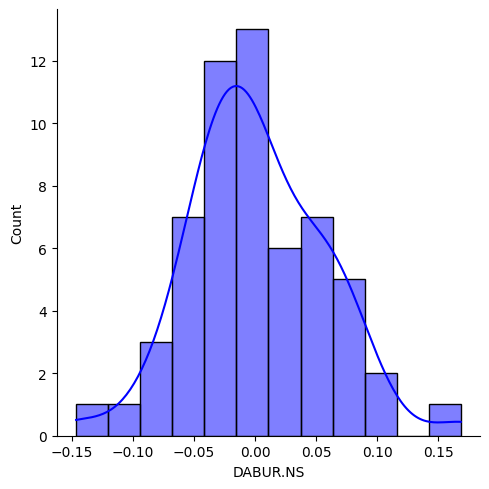

In [5]:
sns.displot(simple_daily_returns['DABUR.NS'], kde=True, color ='blue', bins = 80)
sns.displot(simple_weekly_returns['DABUR.NS'], kde=True, color ='blue', bins = 30)
sns.displot(simple_monthly_returns['DABUR.NS'], kde=True, color ='blue', bins = 12)
sns.displot(log_daily_returns['DABUR.NS'], kde=True, color ='blue', bins = 80)
sns.displot(log_weekly_returns['DABUR.NS'], kde=True, color ='blue', bins = 30)
sns.displot(log_monthly_returns['DABUR.NS'], kde=True, color ='blue', bins = 12)

In [6]:
def plot_heatmap(matrix, title):
    plt.figure(figsize=(42, 21))
    sns.heatmap(matrix, annot=True, cmap="coolwarm",vmin=-1, vmax=1, cbar_kws={"ticks": [],},linewidth=.5)
    plt.grid(False)
    plt.title(title)
    plt.show()

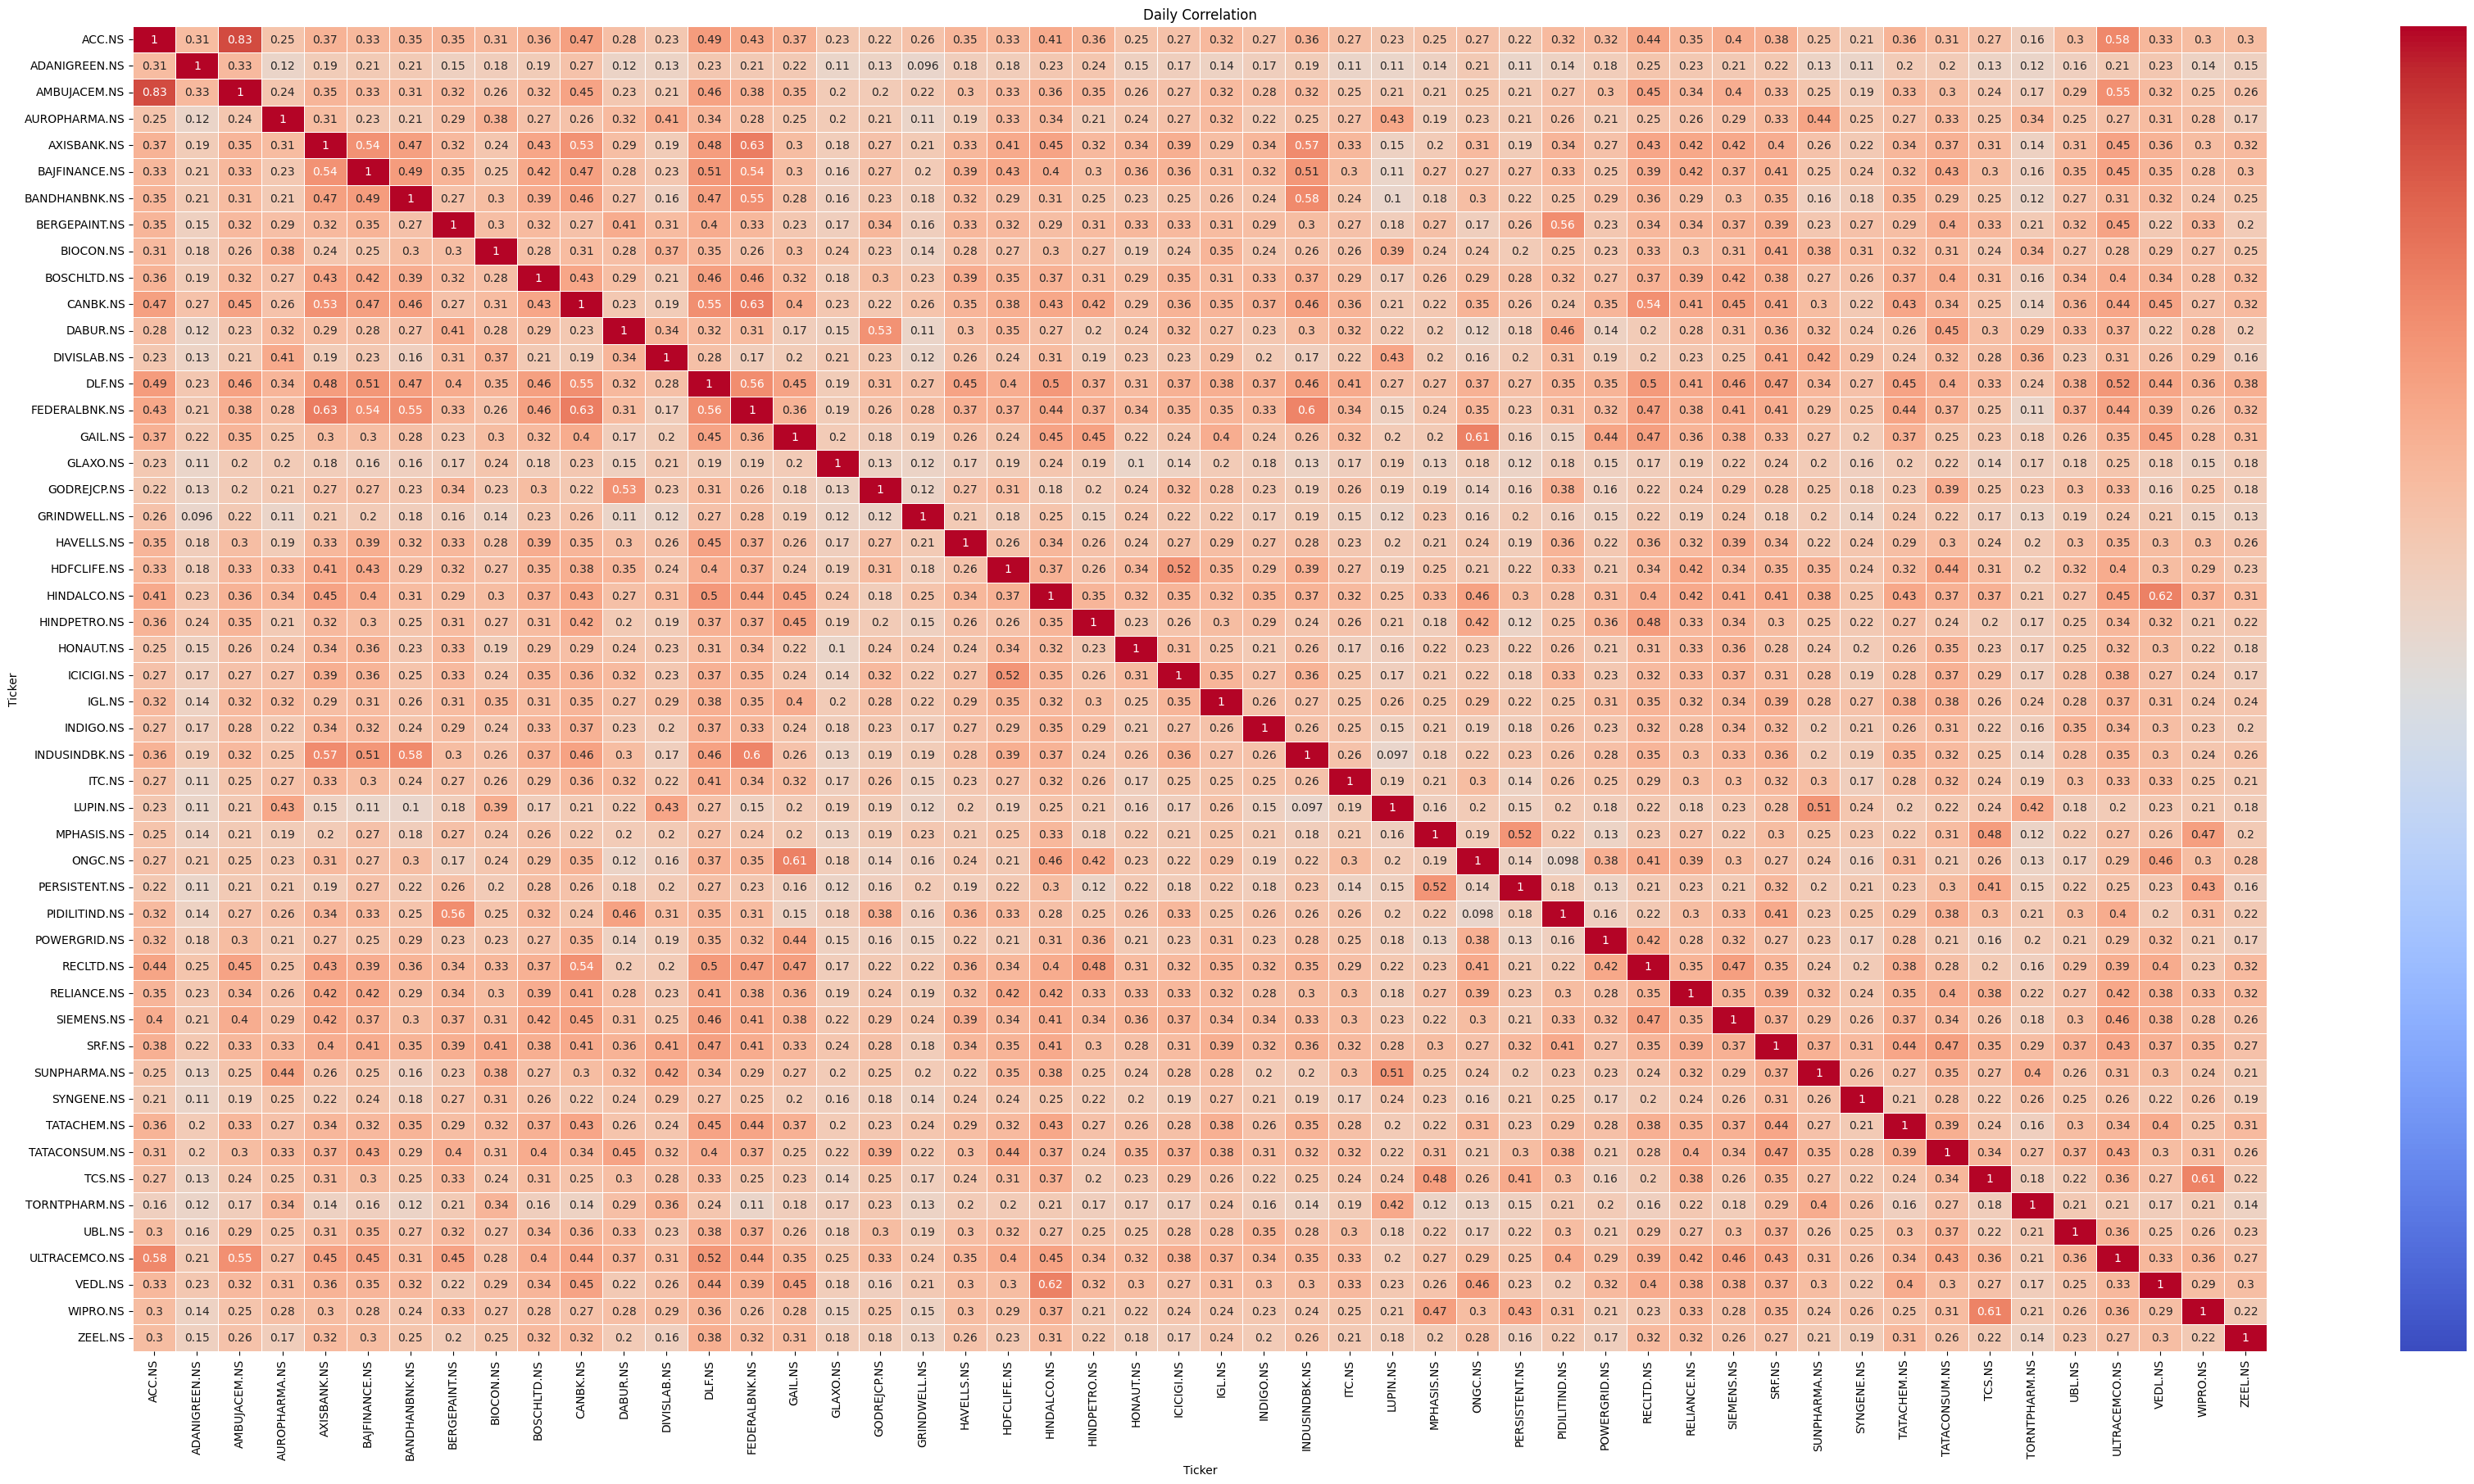

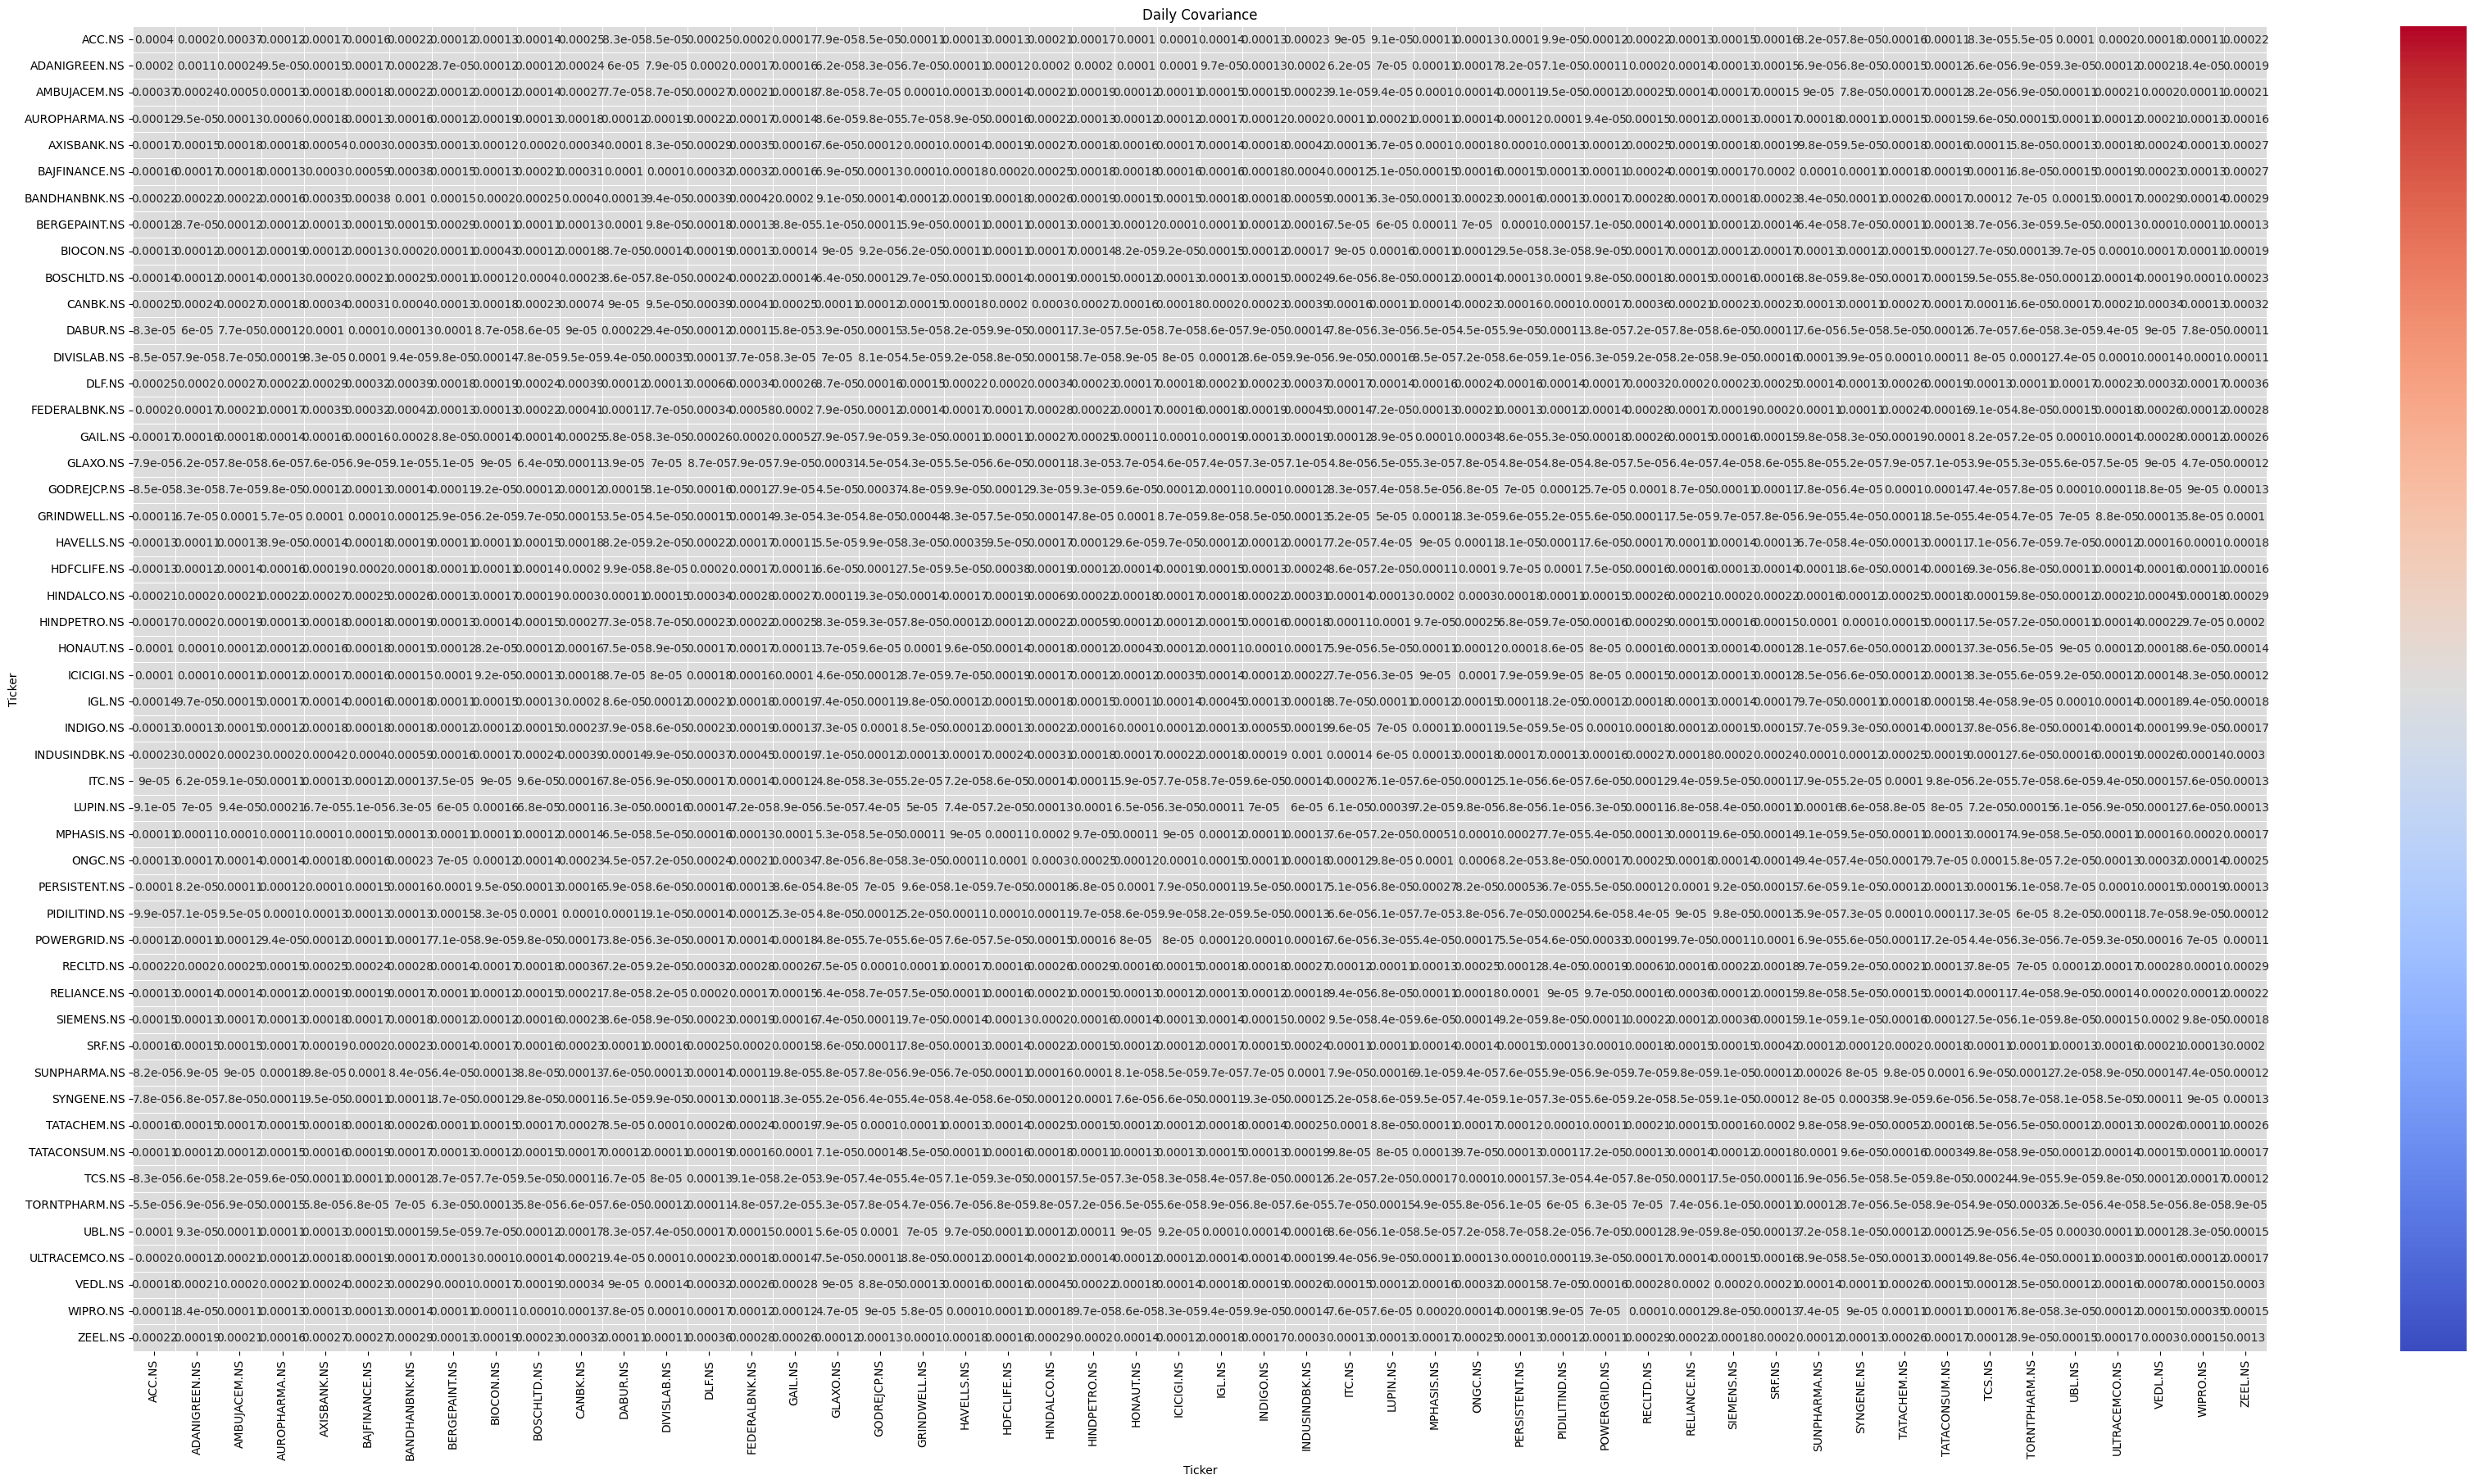

In [7]:
plot_heatmap(corr_daily, "Daily Correlation")
# plot_heatmap(self_daily_corr, "Self Daily Correlation")
plot_heatmap(cov_daily, "Daily Covariance")

# plot_heatmap(corr_weekly, "Weekly Correlation")
# plot_heatmap(cov_weekly, "Weekly Covariance")

# plot_heatmap(corr_monthly, "Monthly Correlation")
# plot_heatmap(cov_monthly, "Monthly Covariance")

# **Monte Carlo with Random Sampling**

In [8]:
start_time = time.time()

def monte_carlo_simulation(returns, num_portfolios, risk_free_rate):
    np.random.seed(42)
    num_assets = len(returns.columns)


    results = np.zeros((5, num_portfolios), dtype=object)
    weights_record = []

    for i in range(num_portfolios):

        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)

        portfolio_return = np.sum(weights * returns.mean()) * 252
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

        results[0, i] = portfolio_return
        results[1, i] = portfolio_stddev
        results[2, i] = sharpe_ratio
        results[3, i] = i
        results[4, i] = weights

    results_df = pd.DataFrame(results[:4].T, columns=['Return', 'StdDev', 'Sharpe', 'Index'])
    results_df['Weights'] = results[4]

    return results_df

monte_carlo_uniform = monte_carlo_simulation(log_daily_returns, 10000, 0.07365)

end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken: {time_taken:.6f} seconds")

Time taken: 64.242594 seconds


# Dirichlet Distribution

In [9]:
start_time = time.time()

def edge_biased_sampling_simulation(returns, num_portfolios=1000000, risk_free_rate=0.07365, alpha=0.01):

    np.random.seed(42)
    num_assets = len(returns.columns)

    # Generate Dirichlet-distributed weights
    dirichlet_weights = np.random.dirichlet([alpha] * num_assets, num_portfolios)

    # Calculate annualized mean returns and covariance matrix
    mean_returns = returns.mean().values * 252
    cov_matrix = returns.cov().values * 252

    # Compute portfolio returns
    portfolio_returns = dirichlet_weights @ mean_returns

    # Compute portfolio standard deviations
    portfolio_stddevs = []
    for i in range(num_portfolios):
        weight = dirichlet_weights[i]
        variance = weight @ cov_matrix @ weight.T  # equivalent to w' * cov_matrix * w
        portfolio_stddevs.append(np.sqrt(variance))

    portfolio_stddevs = np.array(portfolio_stddevs)

    # Compute Sharpe ratios
    sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_stddevs

    # Create results DataFrame
    results_df = pd.DataFrame({
        'Return': portfolio_returns,
        'StdDev': portfolio_stddevs,
        'Sharpe': sharpe_ratios,
        'Index': range(num_portfolios)
    })
    results_df['Weights'] = list(dirichlet_weights)

    return results_df

monte_carlo_dirichlet = edge_biased_sampling_simulation(log_daily_returns)

end_time = time.time()
time_taken = end_time - start_time
print(f"Time taken: {time_taken:.6f} seconds")

Time taken: 10.166381 seconds


# Get optimal portfolio

In [10]:
def get_optimal_portfolio(results_df, target_return):
    min_std_portfolio = results_df.loc[results_df['StdDev'].idxmin()]
    min_return = min_std_portfolio['Return']

    max_return_portfolio = results_df.loc[results_df['Return'].idxmax()]
    max_return = max_return_portfolio['Return']

    if target_return < min_return:
        print(f"Target return {target_return:.2%} is too low. Adjusting to the minimum achievable return of {min_return:.2%}.")
        target_return = min_return

    if target_return > max_return:
        print(f"Return of {target_return:.2%} is not possible with the given assets. The maximum achievable return is {max_return:.2%}.")
        target_return = max_return


    feasible_portfolios = results_df[results_df['Return'] >= target_return]

    optimal_portfolio = feasible_portfolios.loc[feasible_portfolios['StdDev'].idxmin()]

    portfolio_weights = optimal_portfolio['Weights']
    weights_dict = {ticker: f"{weight * 100:.2f}%" for ticker, weight in zip(tickers, portfolio_weights)}

    print(f"Optimal Portfolio for Target Return {target_return:.2%}")
    print("Portfolio Weights:")
    for company, weight in weights_dict.items():
        print(f"{company}: {weight}")
    print(f"Portfolio Return: {optimal_portfolio['Return']:.4f}")
    print(f"Portfolio Standard Deviation: {optimal_portfolio['StdDev']:.4f}")

    return optimal_portfolio


In [12]:
try:
    target_return = float(input("Enter your desired annualized return (e.g., 0.10 for 10%): "))
    optimal_portfolio = get_optimal_portfolio(monte_carlo_dirichlet, target_return)
except ValueError:
    print("Invalid input. Please enter a numerical value for the return.")

Enter your desired annualized return (e.g., 0.10 for 10%): 0.25
Optimal Portfolio for Target Return 25.00%
Portfolio Weights:
HINDALCO.NS: 0.00%
AXISBANK.NS: 0.00%
RECLTD.NS: 0.00%
DLF.NS: 0.00%
WIPRO.NS: 0.00%
BIOCON.NS: 0.00%
HAVELLS.NS: 0.00%
AUROPHARMA.NS: 14.63%
DABUR.NS: 0.00%
SUNPHARMA.NS: 0.00%
BAJFINANCE.NS: 0.00%
ONGC.NS: 7.66%
PIDILITIND.NS: 0.00%
DIVISLAB.NS: 0.00%
BANDHANBNK.NS: 0.00%
AMBUJACEM.NS: 0.00%
ULTRACEMCO.NS: 8.98%
VEDL.NS: 5.79%
SIEMENS.NS: 0.00%
MPHASIS.NS: 0.00%
INDIGO.NS: 0.00%
BERGEPAINT.NS: 0.00%
GAIL.NS: 0.00%
ACC.NS: 0.00%
ICICIGI.NS: 0.00%
HINDPETRO.NS: 0.00%
RELIANCE.NS: 0.00%
TCS.NS: 0.00%
ZEEL.NS: 0.00%
POWERGRID.NS: 0.00%
BOSCHLTD.NS: 0.00%
SYNGENE.NS: 0.00%
GRINDWELL.NS: 16.58%
UBL.NS: 0.00%
GLAXO.NS: 0.00%
PERSISTENT.NS: 0.00%
IGL.NS: 0.00%
GODREJCP.NS: 0.00%
LUPIN.NS: 0.00%
TORNTPHARM.NS: 41.50%
ADANIGREEN.NS: 0.00%
SRF.NS: 0.00%
TATACONSUM.NS: 0.00%
FEDERALBNK.NS: 3.38%
INDUSINDBK.NS: 0.00%
HONAUT.NS: 0.00%
CANBK.NS: 1.48%
HDFCLIFE.NS: 0.00%
TATA

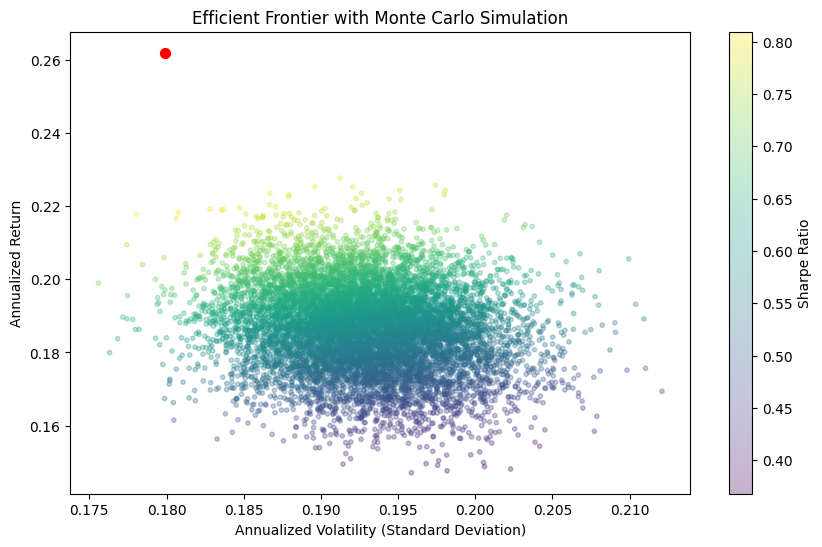

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(monte_carlo_uniform['StdDev'], monte_carlo_uniform['Return'], c=monte_carlo_uniform['Sharpe'], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')

plt.scatter(optimal_portfolio['StdDev'], optimal_portfolio['Return'], color='red', marker='o', s=50)

plt.title('Efficient Frontier with Monte Carlo Simulation')
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Return')
plt.show()

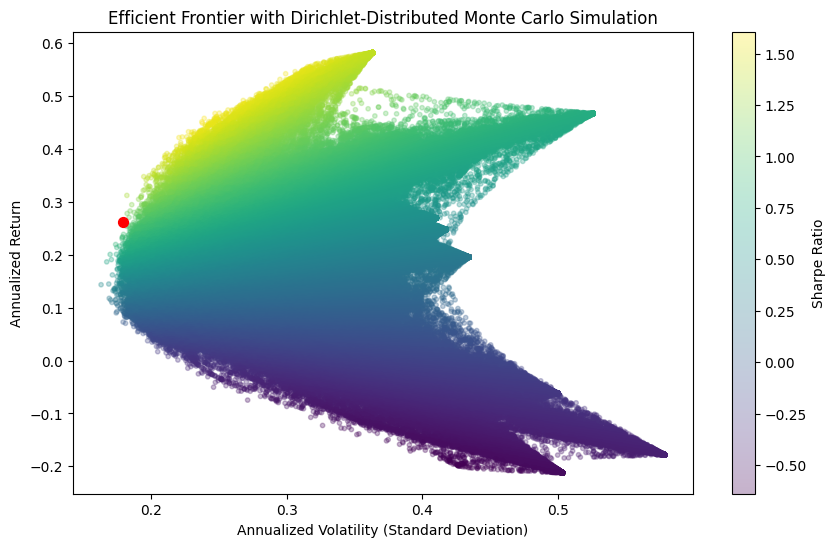

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(monte_carlo_dirichlet['StdDev'], monte_carlo_dirichlet['Return'], c=monte_carlo_dirichlet['Sharpe'], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')

plt.scatter(optimal_portfolio['StdDev'], optimal_portfolio['Return'], color='red', marker='o', s=50)

plt.title('Efficient Frontier with Dirichlet-Distributed Monte Carlo Simulation')
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Return')
plt.show()

# Calculating Beta

In [19]:
def calculate_beta(asset_returns, market_returns):
    betas = []
    for column in asset_returns.columns:
        covariance = np.cov(asset_returns[column], market_returns)[0, 1]
        market_variance = np.var(market_returns)
        beta = covariance / market_variance
        betas.append(beta)
    return np.array(betas)

In [20]:
betas = calculate_beta(asset_returns_log, market_returns_log)
print("\nAsset Betas:")
for ticker, beta in zip(tickers, betas):
    print(f"{ticker}: {beta:.4f}")


Asset Betas:
HINDALCO.NS: 1.3794
AXISBANK.NS: 1.4039
RECLTD.NS: 1.1051
DLF.NS: 1.4210
WIPRO.NS: 0.8178
BIOCON.NS: 0.7012
HAVELLS.NS: 0.7447
AUROPHARMA.NS: 0.8599
DABUR.NS: 0.5475
SUNPHARMA.NS: 0.6206
BAJFINANCE.NS: 1.4157
ONGC.NS: 0.9557
PIDILITIND.NS: 0.6333
DIVISLAB.NS: 0.5875
BANDHANBNK.NS: 1.4045
AMBUJACEM.NS: 0.9366
ULTRACEMCO.NS: 0.9529
VEDL.NS: 1.2195
SIEMENS.NS: 0.8707
MPHASIS.NS: 0.7846
INDIGO.NS: 0.8556
BERGEPAINT.NS: 0.7122
GAIL.NS: 0.8862
ACC.NS: 0.8942
ICICIGI.NS: 0.8224
HINDPETRO.NS: 0.9093
RELIANCE.NS: 1.1028
TCS.NS: 0.7398
ZEEL.NS: 1.1978
POWERGRID.NS: 0.6539
BOSCHLTD.NS: 0.9510
SYNGENE.NS: 0.5204
GRINDWELL.NS: 0.5373
UBL.NS: 0.6376
GLAXO.NS: 0.3948
PERSISTENT.NS: 0.7230
IGL.NS: 0.8227
GODREJCP.NS: 0.6255
LUPIN.NS: 0.4654
TORNTPHARM.NS: 0.4124
ADANIGREEN.NS: 0.7822
SRF.NS: 0.9819
TATACONSUM.NS: 0.8699
FEDERALBNK.NS: 1.3236
INDUSINDBK.NS: 1.5574
HONAUT.NS: 0.7956
CANBK.NS: 1.4267
HDFCLIFE.NS: 0.9704
TATACHEM.NS: 0.9451
ITC.NS: 0.6878


In [21]:
risk_free_rate = 0.07365
market_return_annual = market_returns_log.mean() * 252
def calculate_capm_return(beta, risk_free_rate, market_return):
    return risk_free_rate + beta * (market_return - risk_free_rate)

In [22]:
capm_returns = {}
print("\nCAPM Expected Returns:")
for ticker, beta in zip(tickers, betas):
    expected_return = calculate_capm_return(beta, risk_free_rate, market_return_annual)
    capm_returns[ticker] = expected_return
    print(f"{ticker}: {expected_return:.4%}")


CAPM Expected Returns:
HINDALCO.NS: 16.5408%
AXISBANK.NS: 16.7038%
RECLTD.NS: 14.7159%
DLF.NS: 16.8173%
WIPRO.NS: 12.8051%
BIOCON.NS: 12.0291%
HAVELLS.NS: 12.3189%
AUROPHARMA.NS: 13.0850%
DABUR.NS: 11.0068%
SUNPHARMA.NS: 11.4932%
BAJFINANCE.NS: 16.7821%
ONGC.NS: 13.7220%
PIDILITIND.NS: 11.5778%
DIVISLAB.NS: 11.2729%
BANDHANBNK.NS: 16.7074%
AMBUJACEM.NS: 13.5952%
ULTRACEMCO.NS: 13.7039%
VEDL.NS: 15.4774%
SIEMENS.NS: 13.1569%
MPHASIS.NS: 12.5842%
INDIGO.NS: 13.0567%
BERGEPAINT.NS: 12.1024%
GAIL.NS: 13.2602%
ACC.NS: 13.3132%
ICICIGI.NS: 12.8359%
HINDPETRO.NS: 13.4134%
RELIANCE.NS: 14.7011%
TCS.NS: 12.2861%
ZEEL.NS: 15.3325%
POWERGRID.NS: 11.7147%
BOSCHLTD.NS: 13.6913%
SYNGENE.NS: 10.8264%
GRINDWELL.NS: 10.9391%
UBL.NS: 11.6064%
GLAXO.NS: 9.9913%
PERSISTENT.NS: 12.1747%
IGL.NS: 12.8374%
GODREJCP.NS: 11.5260%
LUPIN.NS: 10.4610%
TORNTPHARM.NS: 10.1080%
ADANIGREEN.NS: 12.5679%
SRF.NS: 13.8966%
TATACONSUM.NS: 13.1514%
FEDERALBNK.NS: 16.1693%
INDUSINDBK.NS: 17.7247%
HONAUT.NS: 12.6572%
CANBK.N

# Finding special portfolios

In [23]:
def find_special_portfolios(results_df):
    gmv_portfolio = results_df.loc[results_df['StdDev'].idxmin()]
    max_sharpe_portfolio = results_df.loc[results_df['Sharpe'].idxmax()]

    gmv_weights = np.array(gmv_portfolio['Weights'])
    max_sharpe_weights = np.array(max_sharpe_portfolio['Weights'])

    gmv_beta = np.dot(gmv_weights, betas)
    max_sharpe_beta = np.dot(max_sharpe_weights, betas)

    print("\nGlobal Minimum Variance Portfolio:")
    print(f"Return: {gmv_portfolio['Return']:.4%}")
    print(f"Risk: {gmv_portfolio['StdDev']:.4%}")
    print(f"Sharpe Ratio: {gmv_portfolio['Sharpe']:.4f}")
    print(f"Portfolio Beta: {gmv_beta:.4f}")
    print("Weights:")
    for ticker, weight in zip(tickers, gmv_weights):
        print(f"{ticker}: {weight:.4%}")

    print("\nMaximum Sharpe Ratio Portfolio:")
    print(f"Return: {max_sharpe_portfolio['Return']:.4%}")
    print(f"Risk: {max_sharpe_portfolio['StdDev']:.4%}")
    print(f"Sharpe Ratio: {max_sharpe_portfolio['Sharpe']:.4f}")
    print(f"Portfolio Beta: {max_sharpe_beta:.4f}")
    print("Weights:")
    for ticker, weight in zip(tickers, max_sharpe_weights):
        print(f"{ticker}: {weight:.4%}")

    return gmv_portfolio, max_sharpe_portfolio

In [25]:
gmv_portfolio, max_sharpe_portfolio = find_special_portfolios(monte_carlo_dirichlet)


Global Minimum Variance Portfolio:
Return: 14.3414%
Risk: 16.3371%
Sharpe Ratio: 0.4270
Portfolio Beta: 1.1194
Weights:
HINDALCO.NS: 0.0000%
AXISBANK.NS: 0.0000%
RECLTD.NS: 0.0000%
DLF.NS: 0.0000%
WIPRO.NS: 0.0000%
BIOCON.NS: 0.0000%
HAVELLS.NS: 0.0000%
AUROPHARMA.NS: 0.0000%
DABUR.NS: 0.0000%
SUNPHARMA.NS: 0.0000%
BAJFINANCE.NS: 0.0000%
ONGC.NS: 20.3070%
PIDILITIND.NS: 0.0003%
DIVISLAB.NS: 0.0000%
BANDHANBNK.NS: 0.0000%
AMBUJACEM.NS: 0.0000%
ULTRACEMCO.NS: 15.6722%
VEDL.NS: 0.0000%
SIEMENS.NS: 8.8332%
MPHASIS.NS: 0.0000%
INDIGO.NS: 0.0000%
BERGEPAINT.NS: 0.0000%
GAIL.NS: 0.0000%
ACC.NS: 0.0000%
ICICIGI.NS: 0.0000%
HINDPETRO.NS: 0.2277%
RELIANCE.NS: 0.0000%
TCS.NS: 0.0000%
ZEEL.NS: 13.0739%
POWERGRID.NS: 0.0000%
BOSCHLTD.NS: 3.7528%
SYNGENE.NS: 0.0000%
GRINDWELL.NS: 0.0000%
UBL.NS: 0.0000%
GLAXO.NS: 0.0000%
PERSISTENT.NS: 0.0000%
IGL.NS: 0.0000%
GODREJCP.NS: 0.0000%
LUPIN.NS: 0.0000%
TORNTPHARM.NS: 0.0000%
ADANIGREEN.NS: 0.0000%
SRF.NS: 0.0000%
TATACONSUM.NS: 0.0000%
FEDERALBNK.NS: 38

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


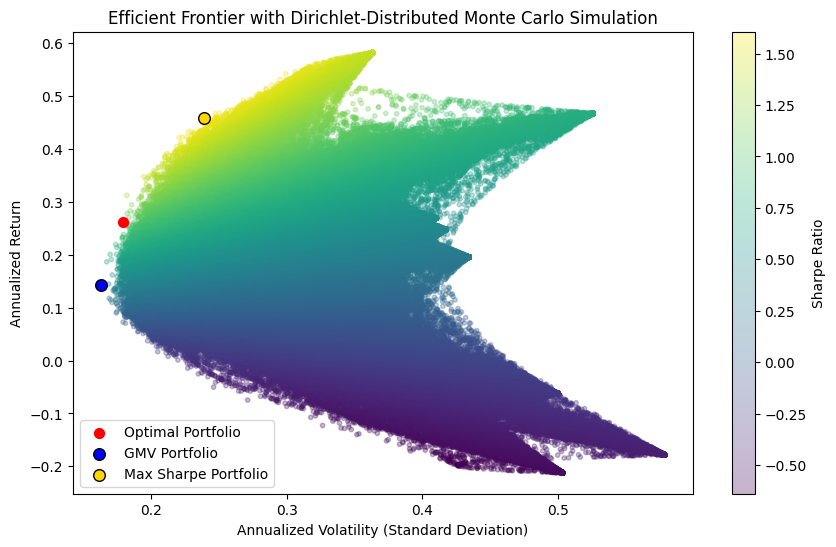

In [27]:
plt.figure(figsize=(10, 6))

# Scatter plot for Monte Carlo simulated portfolios
plt.scatter(monte_carlo_dirichlet['StdDev'], monte_carlo_dirichlet['Return'],
            c=monte_carlo_dirichlet['Sharpe'], cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')

# Highlight the optimal portfolio (user-selected)
plt.scatter(optimal_portfolio['StdDev'], optimal_portfolio['Return'],
            color='red', marker='o', s=50, label="Optimal Portfolio")

# Highlight the Global Minimum Variance (GMV) Portfolio
plt.scatter(gmv_portfolio['StdDev'], gmv_portfolio['Return'],
            color='blue', marker='o', s=70, edgecolors='black', label="GMV Portfolio")

# Highlight the Maximum Sharpe Ratio Portfolio
plt.scatter(max_sharpe_portfolio['StdDev'], max_sharpe_portfolio['Return'],
            color='gold', marker='o', s=70, edgecolors='black', label="Max Sharpe Portfolio")

# Titles and Labels
plt.title('Efficient Frontier with Dirichlet-Distributed Monte Carlo Simulation')
plt.xlabel('Annualized Volatility (Standard Deviation)')
plt.ylabel('Annualized Return')

# Add legend
plt.legend()

plt.show()


Market Return (Annual): 0.14%


<ipython-input-26-70cf98808660>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (betas[i], actual_returns[i]), xytext=(5, 5),


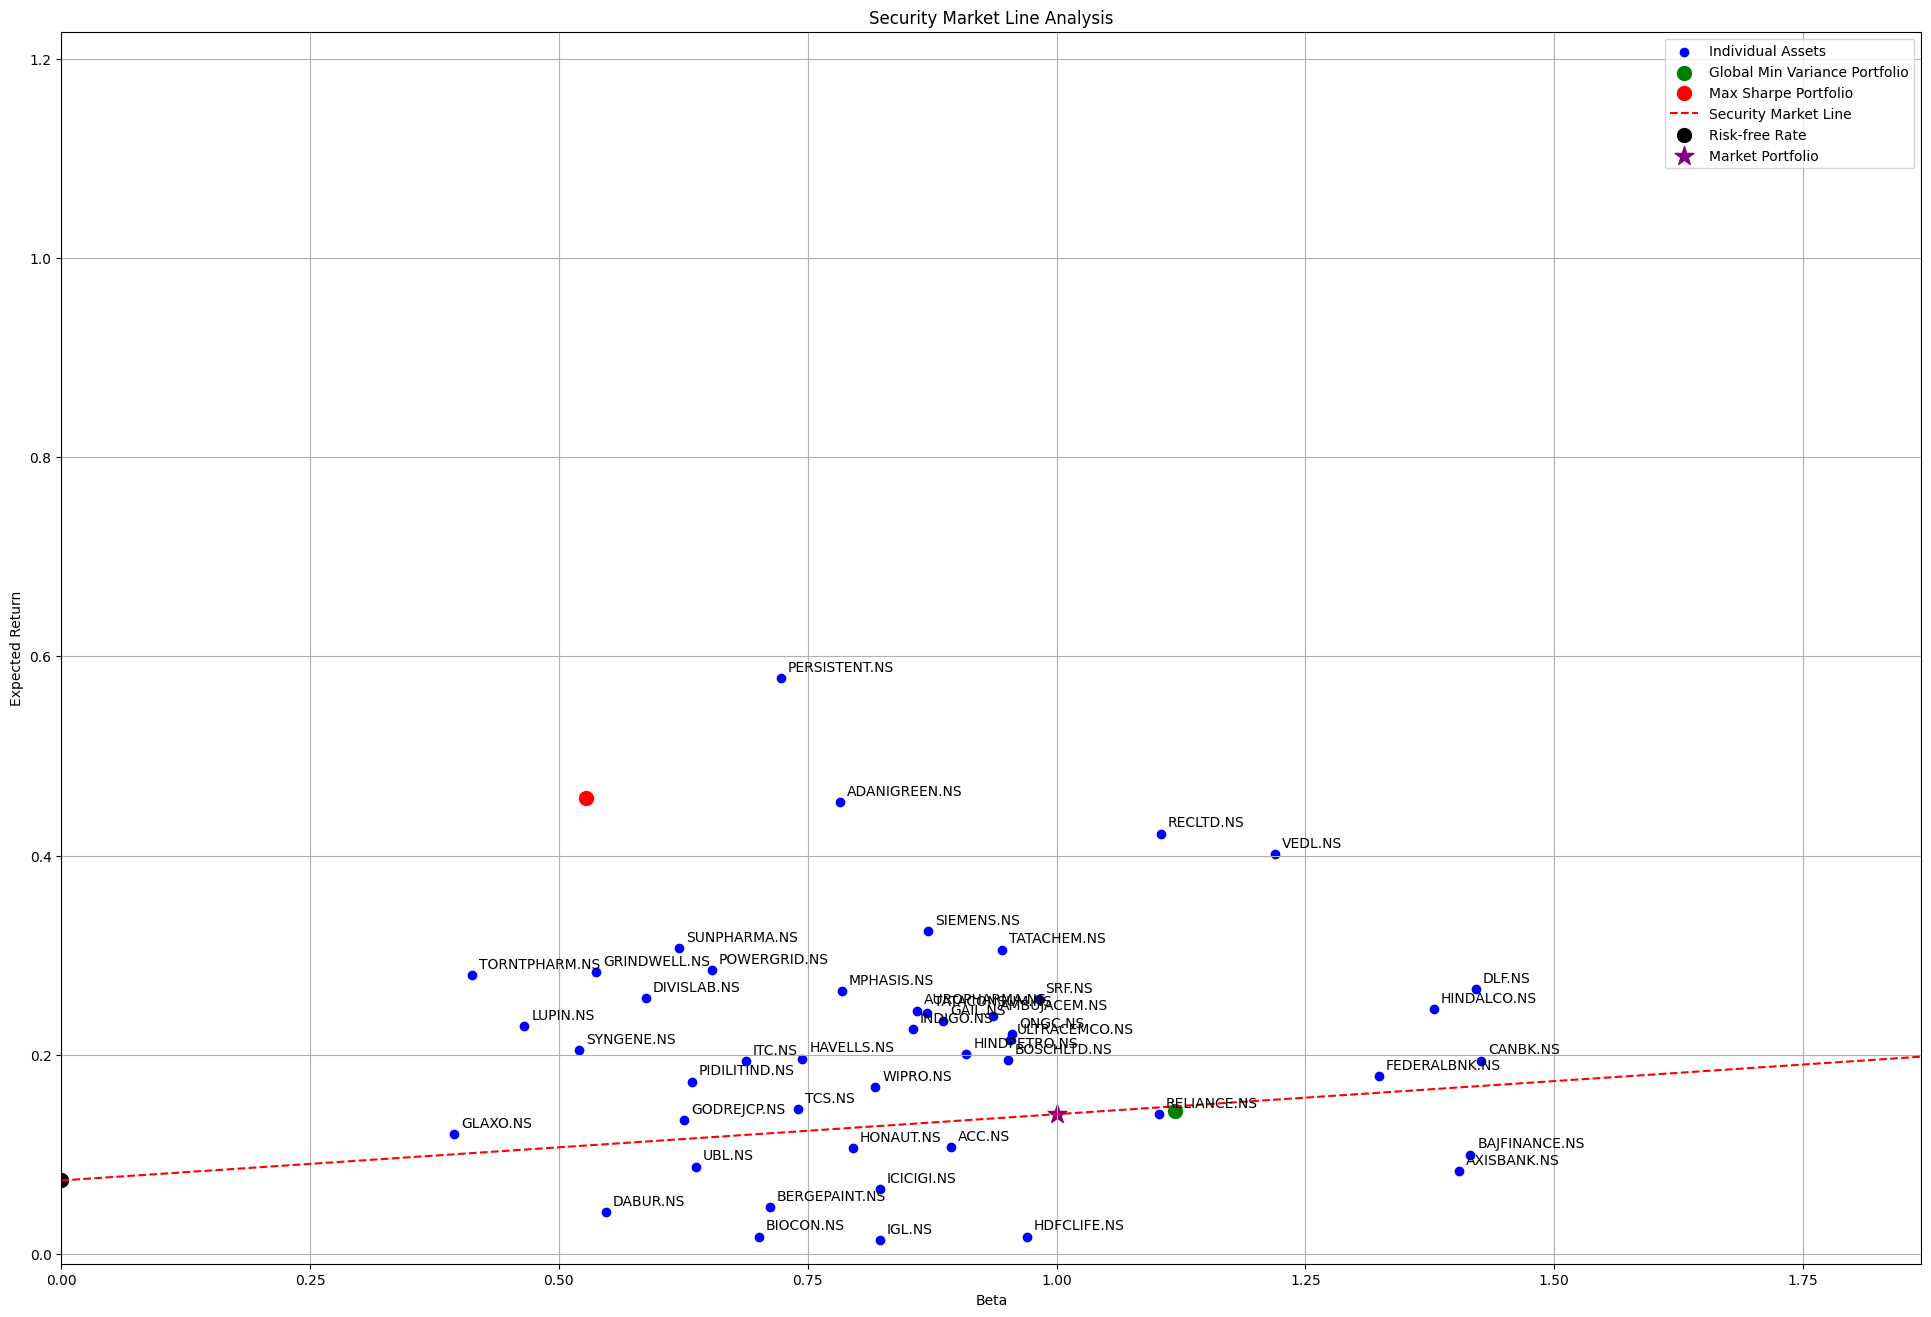

In [26]:
def plot_sml_analysis():
    print(f"Market Return (Annual): {market_return_annual:.2f}%")
    plt.figure(figsize=(24, 16))
    actual_returns = asset_returns_log.mean() * 252
    plt.scatter(betas, actual_returns, label='Individual Assets', color='blue')

    for i, txt in enumerate(tickers):
        plt.annotate(txt, (betas[i], actual_returns[i]), xytext=(5, 5),
                     textcoords='offset points')

    gmv_weights = np.array(gmv_portfolio['Weights'])
    max_sharpe_weights = np.array(max_sharpe_portfolio['Weights'])

    if isinstance(gmv_weights[0], (list, np.ndarray)):
        gmv_weights = np.array(gmv_weights[0])
        max_sharpe_weights = np.array(max_sharpe_weights[0])

    gmv_beta = np.dot(gmv_weights, betas)
    max_sharpe_beta = np.dot(max_sharpe_weights, betas)

    plt.scatter([gmv_beta], [gmv_portfolio['Return']],
                color='green', s=100, label='Global Min Variance Portfolio')

    plt.scatter([max_sharpe_beta], [max_sharpe_portfolio['Return']],
                color='red', s=100, label='Max Sharpe Portfolio')

    beta_range = np.linspace(0, max(betas) * 1.2, 100)
    sml = np.array([calculate_capm_return(beta, risk_free_rate, market_return_annual)
                    for beta in beta_range])
    plt.plot(beta_range, sml, 'r--', label='Security Market Line')

    plt.scatter([0], [risk_free_rate], color='black', marker='o',
                s=100, label='Risk-free Rate')

    plt.scatter([1], [market_return_annual], color='purple', marker='*',
                s=200, label='Market Portfolio')

    plt.xlim(0, max(betas) * 1.2)
    plt.ylim(-0.01, max(sml) * 6.2)

    plt.title('Security Market Line Analysis')
    plt.xlabel('Beta')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_sml_analysis()